In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data importing
df = pd.read_csv('bank-marketing.csv')
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [4]:
# finding the number of rows & columns
df.shape

(45211, 19)

In [5]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
# Finding the no of missing values in each column
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [7]:
#we are cchecking if there is  any other value in columns rather then null value
df.isin(['?','NA','N/A']).any()

age          False
job          False
salary       False
marital      False
education    False
targeted     False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response     False
dtype: bool

In [8]:
#finding if duplicate rows are present
df_dup = df[df.duplicated(keep='last')]
df_dup

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [9]:
# Statistical summary of numerical columns
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Duration:
This attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call, the target variable y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [11]:
#droping  off all observation which contains duration = 0
df.drop(df[df['duration']==0].index,inplace=True)

In [12]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000
mean,40.936294,57003.760396,1362.228676,15.806052,258.180211,2.763560,40.200562,0.580362
std,10.618823,32084.774782,3044.794660,8.322417,257.527769,3.097582,100.131506,2.303513
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
df.shape

(45208, 19)

### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [14]:
df.pdays.describe()

count    45208.000000
mean        40.200562
std        100.131506
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [15]:
df.pdays.median()

-1.0

* As we can observe above, there are values as -1 which doesn't conclude anything,because pdays basically means ' is the number of days that passed by after the client was last contacted from previous campaign', so in this -1 is bit out of fit.
* Here mean = -1,minimum value = -1 and median =-1 ,which doesn't infer anything

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values? 

In [16]:
df1 = df[df['pdays']>0]
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [19]:
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [20]:
df1.pdays.median()


194.0

* After selecting relevent values we can observe mean=224,minimum value=1 and median = 194

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [21]:
df.groupby('education')['balance'].median()

education
primary      404
secondary    392
tertiary     577
unknown      568
Name: balance, dtype: int64

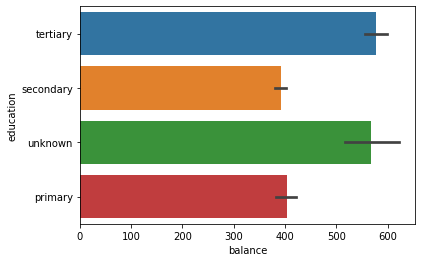

In [22]:
sns.barplot(x=df['balance'],y =df['education'],estimator=np.median)
plt.show()

* Tertiary education has highest median under balances.
* Unknown is second highest medain under blances.

### Make a box plot for pdays. Do you see any outliers?

In [23]:
df1.pdays.value_counts()

182    167
92     147
91     126
183    126
181    117
      ... 
3        1
850      1
842      1
826      1
603      1
Name: pdays, Length: 558, dtype: int64

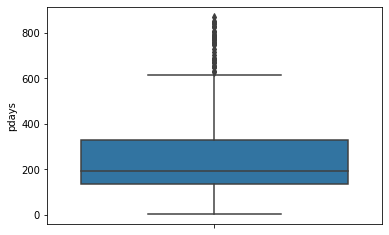

In [24]:
sns.boxplot(y=df1['pdays'])
plt.show()

* Above plot is by using pday with know values and ignoring missing value(-1) and contains outliers.

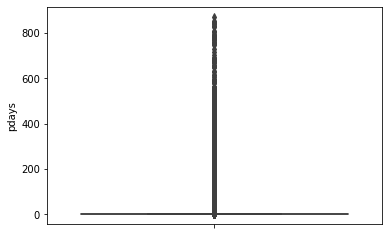

In [25]:
sns.boxplot(y=df['pdays'])
plt.show()

In [26]:
df.pdays.value_counts()

-1      36951
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

* This plot including missing values(-1), and we have see outlier in both kind of data, as we see above there are 36954 values are missing(-1).

### The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”
* First, perform bi-variate analysis to identify the features that are directly associated with the target variable
* Convert the response variable to a convenient form

### Target variable

In [27]:
#Count of  different value in response variable
df['response'].value_counts()

no     39919
yes     5289
Name: response, dtype: int64

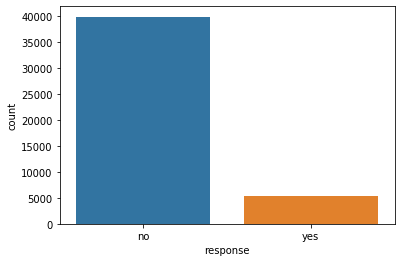

In [28]:
sns.countplot(df['response'])
plt.show()

* we can see from above plot the response variable have imbalance data in which no value is greater than yes

In [29]:
# Making respone variable to dummy variable
df = pd.get_dummies(df,columns=['response'],drop_first=True)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response_yes
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


## Categorical data analysis

In [30]:
# Checking unique value in categorical variable
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']
for i in categorical_cols:
    print(i+':\n',df[i].unique())
    print('---------------------')

job:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
---------------------
marital:
 ['married' 'single' 'divorced']
---------------------
education:
 ['tertiary' 'secondary' 'unknown' 'primary']
---------------------
default:
 ['no' 'yes']
---------------------
housing:
 ['yes' 'no']
---------------------
loan:
 ['no' 'yes']
---------------------
contact:
 ['unknown' 'cellular' 'telephone']
---------------------
month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
---------------------
poutcome:
 ['unknown' 'failure' 'other' 'success']
---------------------


In [34]:
# putting  admin & management in same categorical value
lst = [df]
for col in lst:
    col.loc[col['job']=='admin.','job'] = 'management'

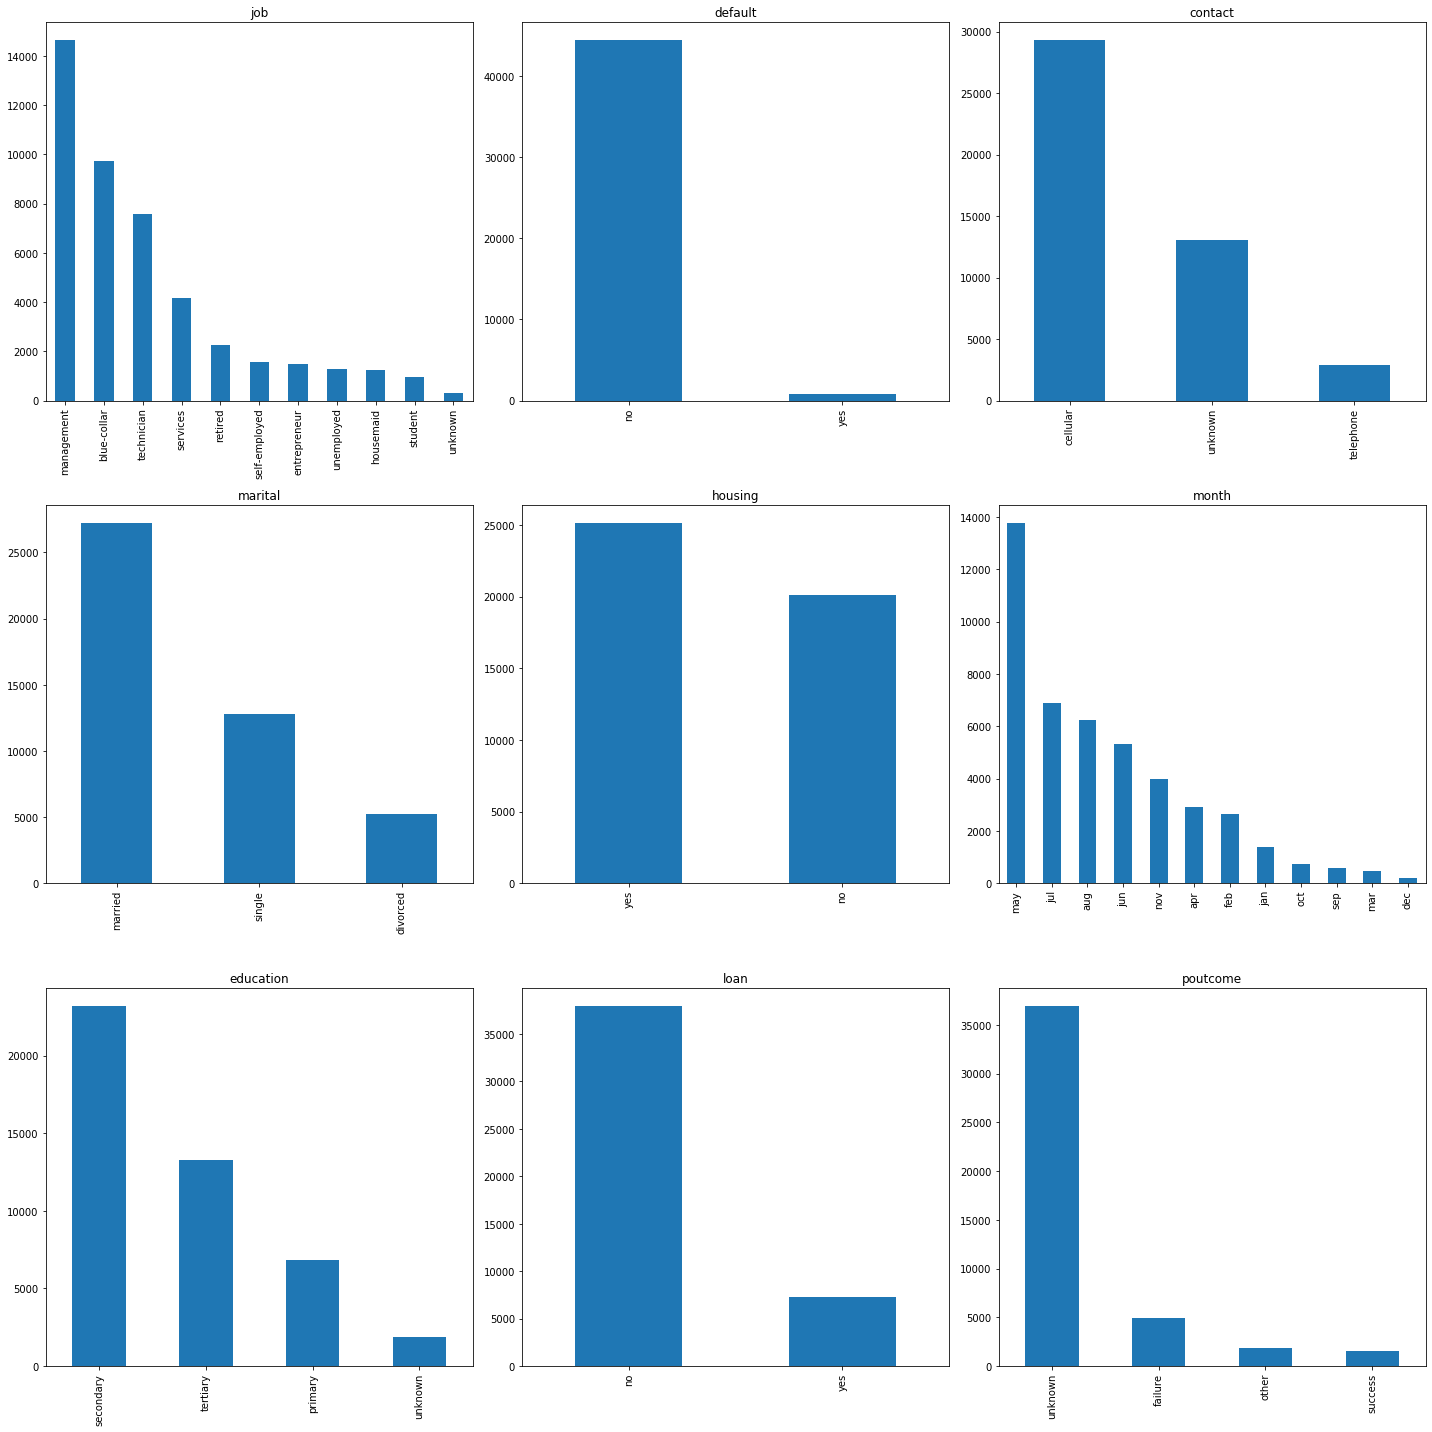

In [33]:
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']
fig, axes =plt.subplots(nrows=3,ncols=3,figsize=(20,20))
for i, col in enumerate(categorical_cols):
    row_index = (i%3)
    col_index =int(i/3)
    fig.add_subplot(df[col].value_counts().plot.bar(ax=axes[row_index,col_index],title=col))
    plt.tight_layout()

#### Inference
* Most of the people contacted are from job -Managment,blue-coller,technician and so on.
* as we can see above ,Very few people are contacted who are defaulter.
* Most of the communication made through cellular.
* Most of the people are married and single.
* Most of the people are contacted in May month and less contacted in December.
* Most pepole who contacted have secondary and teriary education.
* Less people are contacted who have loan.
* Most of the people contacted have previous outcome 'Unknown'.


### Numerical variable analysis

### 1. Age

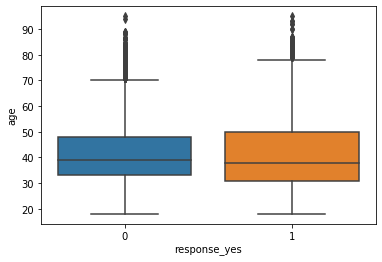

In [35]:
sns.boxplot(data=df, x="response_yes", y="age")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df["age"])

As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

### Feature: duration (numeric)


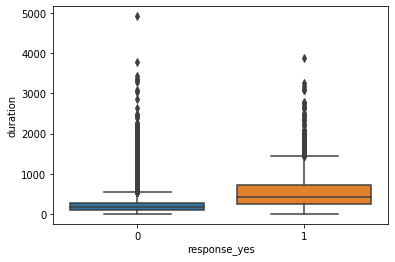

In [36]:
sns.boxplot(data=df, x="response_yes", y="duration")
plt.show()

From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable.

In [37]:
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome']

In [38]:
numerical_cols = [x for x in df.columns.to_list() if x not in categorical_cols]
numerical_cols.remove('response_yes')
##numerical_cols.remove('age group')


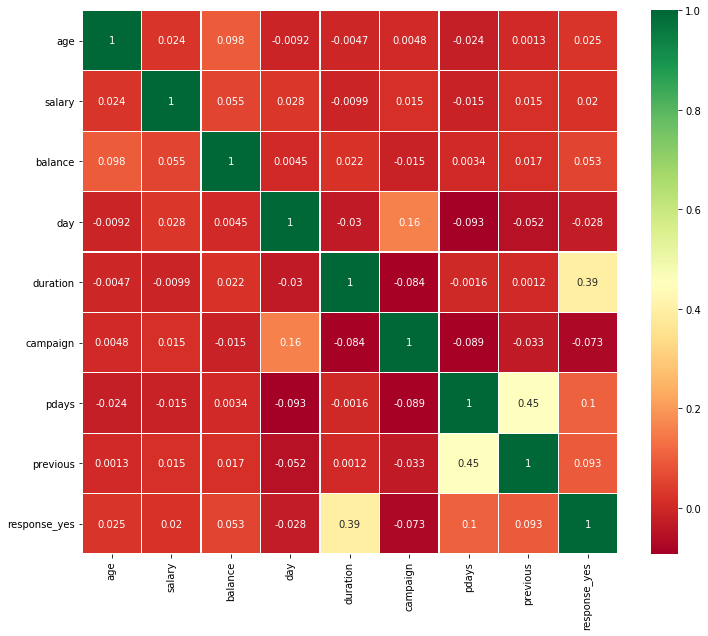

In [39]:
corr_data = df[numerical_cols+['response_yes']]
corr = corr_data.corr()
plt.close()
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.show()

### Are the features about the previous campaign data useful
* As we can observe in above correlation matrix, previous campaign data is not much correlated. and have only 0.0093 almost close to 0. so previous data cannot be used to predict.

#### Other observation
* pday and previous have higher correlation.
* duration have a higher correlation with our target variable.
* Numerical features have very less correlation b/w them.

## Are pdays and poutcome associated with the target?

In [40]:
pd.crosstab(df['pdays'],df['poutcome'],values=df['response_yes'],aggfunc='count',margins=True,normalize=True)

poutcome,failure,other,success,unknown,All
pdays,,,,,
-1,0.000000,0.000000,0.000000,0.817355,0.817355
1,0.000066,0.000066,0.000199,0.000000,0.000332
2,0.000022,0.000774,0.000022,0.000000,0.000818
3,0.000000,0.000022,0.000000,0.000000,0.000022
4,0.000022,0.000000,0.000022,0.000000,0.000044
...,...,...,...,...,...
842,0.000022,0.000000,0.000000,0.000000,0.000022
850,0.000022,0.000000,0.000000,0.000000,0.000022
854,0.000022,0.000000,0.000000,0.000000,0.000022


In [41]:
pd.crosstab(df['pdays'],df['previous'],values=df['response_yes'],aggfunc='count',margins=True,normalize=True)

previous,0,1,2,3,4,5,6,7,8,9,...,35,37,38,40,41,51,55,58,275,All
pdays,,,,,,,,,,,,,,,,,,,,,
-1,0.817355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817355
1,0.000000,0.000111,0.000022,0.000044,0.000000,0.000022,0.000044,0.000066,0.000022,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000332
2,0.000000,0.000310,0.000177,0.000155,0.000022,0.000088,0.000022,0.000022,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000818
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022
4,0.000000,0.000044,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022
850,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022
854,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022


#### Observations:
* pdays and poutcome are asscociated with each other
* from previous marketing campaign, we can see that there was a outcome,when there are more contacts made to a particular client.
* pdays = -1 has overall count of 36954 same as previous =0 ,which implies that many of people were not contacted.

### Inference:
So to proceed further, we can just retain pdays value, as we can say, in previous campaign the client were not contact for so many people, so the previous value is 0 for all those 36954 contacts

In [43]:
#Converting previous marketing campaign variable into dummy variable
df = pd.get_dummies(df,drop_first=True)

### Train test Split

In [44]:
X = df.drop('response_yes',axis=1)
y = df['response_yes']

## Predictive model 1: Logistic regression
1. Before we build a model, lets select top features using RFE, so that model predict better

In [45]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [49]:
#spliting data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [48]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31645, 43), (13563, 43), (31645,), (13563,))

In [64]:
#Logistics Regression model
lm = LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression()

In [65]:
# Using rfe with 10 features
rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)
rfe_ = X_train.columns[rfe.support_]
rfe_

Index(['housing_yes', 'contact_unknown', 'month_aug', 'month_dec', 'month_jan',
       'month_jul', 'month_mar', 'month_oct', 'month_sep', 'poutcome_success'],
      dtype='object')

In [66]:
#Function to check vif
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF',ascending = False)
    return vif

In [67]:
X_train_new = X_train[rfe_]

In [68]:
checkVIF(X_train_new)

,Features,VIF
3,month_dec,1.01
8,month_sep,0.35
6,month_mar,0.24
4,month_jan,0.21
5,month_jul,0.05
9,poutcome_success,0.03
0,housing_yes,0.02
1,contact_unknown,0.02
2,month_aug,0.01
7,month_oct,0.00


 As Month of dec has highest VIF value,we will remove that feature
 
 -- so we will consider the rest of the features for building our model

In [69]:
X_new = df[['housing_yes', 'contact_unknown', 'month_aug', 'month_jan',
       'month_jun', 'month_mar', 'month_oct', 'month_sep', 'poutcome_success']]

In [70]:
# Spliting data again
X_train_new,X_test_new,y_train,y_test = train_test_split(X_new,y,test_size=0.3,random_state=0)


In [71]:
z = lm.fit(X_train_new,y_train)
z

LogisticRegression()

### Estimate the model performance using k fold cross validation 

In [72]:
auc = [X_train,X_train_new]
models = []
models.append(('LogisticsRegression',LogisticRegression()))
for i in auc:
    kfold = KFold(n_splits=10,random_state=0)
    cv_results = cross_val_score(LogisticRegression(),i,y_train,cv=kfold,scoring='accuracy')
    msg ='%s: %f (%f)' % (LogisticRegression, cv_results.mean(),cv_results.std())
    print(msg)

<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.887881 (0.006496)
<class 'sklearn.linear_model._logistic.LogisticRegression'>: 0.893980 (0.007086)


By using thefeatures we got from VIF and KFold ,we have got an accuracy of 89%.

In [73]:
y_pred = z.predict(X_test_new)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [74]:
X_test_new.shape

(13563, 9)

In [75]:
y_pred.shape

(13563,)

In [76]:
#Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [77]:
print(confusion_matrix(y_test,y_pred))

[[11772   158]
 [ 1351   282]]


### precision, recall, accuracy of your model

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11930
           1       0.64      0.17      0.27      1633

    accuracy                           0.89     13563
   macro avg       0.77      0.58      0.61     13563
weighted avg       0.87      0.89      0.86     13563



### most important from your model

* Month,housing,poutcome,contact

## Predictive model 2: Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [80]:
rfc = RandomForestClassifier(n_estimators=30, max_depth=30)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, n_estimators=30)

In [81]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [82]:
print(confusion_matrix(y_test,y_pred))

[[11626   304]
 [ 1084   549]]


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11930
           1       0.64      0.34      0.44      1633

    accuracy                           0.90     13563
   macro avg       0.78      0.66      0.69     13563
weighted avg       0.88      0.90      0.88     13563



### Estimate the model performance using k fold cross validation

In [84]:
p = [X_train,X_train_new]
for i in p:
    kfold = KFold(n_splits=10,random_state=0)
    cv_results = cross_val_score(RandomForestClassifier(),i,y_train,cv=kfold,scoring='accuracy')
    msg ='%s: %f (%f)' % (RandomForestClassifier, cv_results.mean(),cv_results.std())
    print(msg)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>: 0.905293 (0.006132)
<class 'sklearn.ensemble._forest.RandomForestClassifier'>: 0.894359 (0.007009)


### As we can observe above
* CV score(for all features) :0.903
* CV score (for selected features) : 0.8943

In [85]:
model_new = RandomForestClassifier(n_estimators =45,max_depth=10)
model_new.fit(X_train_new,y_train)

RandomForestClassifier(max_depth=10, n_estimators=45)

In [86]:
y1_pred = model_new.predict(X_test_new)

In [87]:
print('For selected features')
print(accuracy_score(y_test,y1_pred))

For selected features
0.88940499889405


In [88]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11930
           1       0.68      0.15      0.25      1633

    accuracy                           0.89     13563
   macro avg       0.79      0.57      0.60     13563
weighted avg       0.87      0.89      0.86     13563



### Which metric did you choose and why?
we used classification performance metrics such as, Precision score,accuracy score,recall score and Cross val score etc. In order to estimate the error, the model is required to test a dataset which it hasn't seen yet.

### Which model has better performance on the test set?  

Logistic has got better accuracy score campared to random foreset, hence we can say that it has better performance is an important model as it results in high AUC score